# Anonymized Data - KNN Project

**In this project I have an dataset of anonymized data, that is, the features of the data are not labeled in such a way that their purpose is revealed.**

**I will first extract the data using pandas, followed by developing a KNN prediction model using sklearn.**

**I will divide this project into sections, so that anyone looking for a particular part of this project can have an easier time locating it.**

1. Imports and Data Wrangling
2. Model Training/Testing
3. Conclusions

# 1. Imports and Data Wrangling

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

**Here I will extract the data into a pandas dataframe. Note that all features are quantitative.**

In [2]:
df = pd.read_csv('anonymized')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**I will now look my data's descriptive statistics. I am looking for the standard deviations of my features, as well as their ranges, in order to determine how I should scale my data.**

In [4]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


**Note here that the standard deviations for our data are quite large. Since KNN uses Euclidean distance, I will most definitely be required to scale my data. Looking at the ranges of my features leads me to believe that standardizing my data will be the best choice, but I will also fit a model using a normalized version of the dataset as well.**

**I am going to create two version of my dataset for use in my models. I will create a standardized version, as well as a normalized version.**

**Standardized**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [10]:
scaled_feat = scaler.transform(df.drop('TARGET CLASS', axis=1))

**I will now create a scaled version of my dataframe using the scaled features.**

In [22]:
scaled_df = pd.DataFrame(scaled_feat,columns=df.columns[0:10])

In [23]:
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


**Normalized**

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
minmax = MinMaxScaler()

In [18]:
minmax.fit(df.drop('TARGET CLASS', axis=1))

MinMaxScaler()

In [19]:
norm_feat = minmax.transform(df.drop('TARGET CLASS', axis=1))

**I will now create a normalized version of my dataframe using the scaled features.**

In [20]:
norm_df = pd.DataFrame(norm_feat, columns=df.columns[0:10])

In [21]:
norm_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.770817,0.370309,0.804966,0.418262,0.299981,0.575371,0.668665,0.236991,0.640471,0.266258
1,0.473432,0.258509,0.829789,0.325119,0.644450,0.743626,0.259619,0.323978,0.509108,0.271472
2,0.610195,0.371486,0.633395,0.618149,0.509431,0.912970,0.248643,0.621579,0.846534,0.528528
3,0.495354,0.486051,0.184296,0.564674,0.226209,0.237874,0.259449,0.245162,0.492291,0.464354
4,0.475788,0.600833,0.291857,0.856246,0.464847,0.485566,0.276074,0.481590,0.224672,0.611149


# Model Training/Testing

**I will now begin by splitting both datasets into train/test sets. I will use the same random state for each split in order to ensure both datasets have the exact same arrangement of features.**

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X = scaled_df
y = df['TARGET CLASS']
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X = norm_df
y = df['TARGET CLASS']
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Since we are using the same random state for both datasets, our train/test datasets should contain the exact same arrangement of features. I will now confirm this by checking to see if the indices are equal.**

In [31]:
X_norm_train.index == X_scaled_train.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**I am now ready to train my KNN models using each training set.**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

**I will begin by choosing n_neighbors=1. I will without a doubt have to change this number, but I believe this is a good starting point.**

In [36]:
knn_scaled = KNeighborsClassifier(n_neighbors=1)
knn_norm = KNeighborsClassifier(n_neighbors=1)

In [37]:
knn_scaled.fit(X_scaled_train, y_train)
knn_norm.fit(X_norm_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**I will now evaluate my models by using sklearn's confusion matrix and classification report functionality.**

In [39]:
pred_scaled = knn_scaled.predict(X_scaled_test)
pred_norm = knn_norm.predict(X_norm_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

**Evaluation report for scaled version**

In [41]:
print(confusion_matrix(y_test, pred_scaled))

[[109  43]
 [ 41 107]]


In [42]:
print(classification_report(y_test, pred_scaled))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



**Evaluation report for normalized version**

In [43]:
print(confusion_matrix(y_test, pred_norm))

[[114  38]
 [ 41 107]]


In [44]:
print(classification_report(y_test, pred_norm))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       152
           1       0.74      0.72      0.73       148

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



**We can see that for k=1, the normalized version of our model performed better than our scaled version. However, both versions performed poorly, so I will now try to improve the models using different k-values. I will do this by using a for loop in order to iterate through successive k-values, and create an error rate tracker which I will then plot.**

**Standardized version**

In [95]:
error_rate_scaled = []
for i in range(1,40):
    knn_scaled = KNeighborsClassifier(n_neighbors=i)
    knn_scaled.fit(X_scaled_train, y_train)
    pred_scaled = knn_scaled.predict(X_scaled_test)
    error_rate_scaled.append(np.mean(pred_scaled != y_test))

**Normalized version**

In [96]:
error_rate_norm = []
for i in range(1,40):
    knn_norm = KNeighborsClassifier(n_neighbors=i)
    knn_norm.fit(X_norm_train, y_train)
    pred_norm = knn_norm.predict(X_norm_test)
    error_rate_norm.append(np.mean(pred_norm != y_test))

**I will now plot the error rates so that we can visualize how our models have improved with each value of k**

Text(0, 0.5, 'Error Rate')

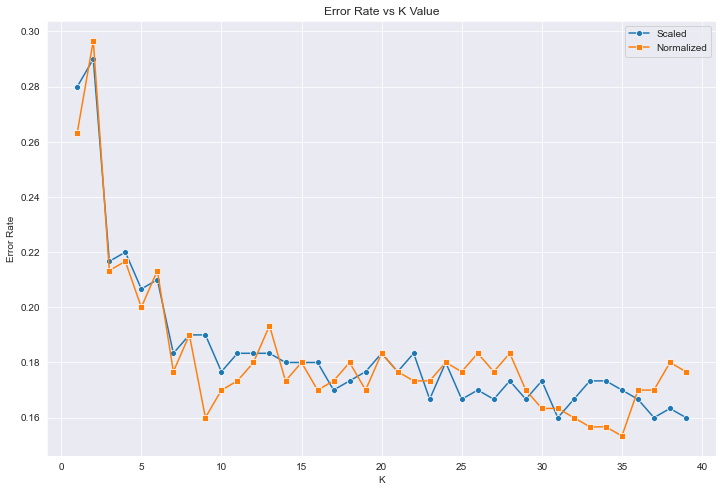

In [97]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x=range(1,40), y=error_rate_scaled, marker='o', label='Scaled')
sns.lineplot(x=range(1,40), y=error_rate_norm, marker='s', label='Normalized')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Looks like our normalized model performs best when k=35, having an error rate of about 15%. Let's retrain our model using this K value.**

In [90]:
knn_norm = KNeighborsClassifier(n_neighbors=35)
knn_norm.fit(X_norm_train, y_train)
pred_norm = knn_norm.predict(X_norm_test)
print(confusion_matrix(y_test, pred_norm))
print(classification_report(y_test, pred_norm))

[[124  28]
 [ 18 130]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       152
           1       0.82      0.88      0.85       148

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Conclusions

**Overall it looks like, for this particular dataset, normalizing our dataset had the greatest affect on improving the accuracy of our KNN model. When choosing k=35, our normalized KNN model had an accuracy of 85%.**